In [1]:
import pandas as pd
import numpy as np
import re
import warnings
data = pd.read_csv('/content/drive/MyDrive/5340/batsmen.csv')

In [2]:
data.dtypes

Player          object
Country         object
Innings        float64
Runs Scored    float64
Balls Faced    float64
4s             float64
6s             float64
Match Date      object
Opposition      object
Ground          object
dtype: object

In [3]:
data.isna().sum()

Player          75
Country         84
Innings         89
Runs Scored     98
Balls Faced     82
4s              98
6s              92
Match Date     104
Opposition      84
Ground          84
dtype: int64

In [4]:
object_columns = data.select_dtypes(include=['object'])
mode_values_object = object_columns.mode()

print("Mode for object-type columns:")
print(mode_values_object)


Mode for object-type columns:
      Player Country  Match Date Opposition      Ground
0  RG Sharma     IND  2016-11-22  v England  Manchester
1        NaN     NaN  2018-08-19        NaN         NaN


In [5]:

data.dropna(subset=['Player'], inplace=True)
data.isna().sum()


Player          0
Country        52
Innings        56
Runs Scored    55
Balls Faced    47
4s             58
6s             48
Match Date     62
Opposition     50
Ground         46
dtype: int64

In [6]:
mode_values_object = data.select_dtypes(include=['object']).mode()

data_object_columns = data.select_dtypes(include=['object'])
data_filled = data_object_columns.fillna(mode_values_object.iloc[0])

data.update(data_filled)


In [7]:
median_values_int = data[['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s']].median()
# mean_values_int = data[['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s']].mean()
# mode_values_int = data[['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s']].mode()
# Fill NaN values in integer-type columns with the median
data_int_columns = data[['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s']]
data_int_filled = data_int_columns.fillna(median_values_int)

data.update(data_int_filled)


In [8]:
data['Strike_Rate'] = (data['Runs Scored'] / data['Balls Faced'])*100
data['Strike_Rate'].fillna(data['Strike_Rate'].mean(), inplace=True)


In [9]:
data.isna().sum()

Player         0
Country        0
Innings        0
Runs Scored    0
Balls Faced    0
4s             0
6s             0
Match Date     0
Opposition     0
Ground         0
Strike_Rate    0
dtype: int64

In [10]:
data

,Player,Country,Innings,Runs Scored,Balls Faced,4s,6s,Match Date,Opposition,Ground,Strike_Rate
0,Shubman Gill,IND,2.0,135.0,83.0,13.0,0.0,2021-03-27,v Australia,Indore,162.650602
1,Shubman Gill,IND,4.0,114.0,76.0,10.0,1.0,2021-09-02,v Sri Lanka,Wankhede,150.000000
2,Fakhar Zaman,PAK,2.0,156.0,92.0,2.0,11.0,2022-06-10,v South Africa,Centurion,169.565217
3,Fakhar Zaman,PAK,2.0,101.0,52.0,6.0,0.0,2016-01-23,v Bangladesh,Eden Gardens,194.230769
4,BA Stokes,ENG,3.0,118.0,50.0,4.0,0.0,2023-09-16,v England,Manchester,236.000000
...,...,...,...,...,...,...,...,...,...,...,...
5495,PR Stirling,IRE,4.0,38.0,32.0,4.0,0.0,2019-03-02,v Afghanistan,Dehradun,118.750000
5496,Fakhar Zaman,PAK,3.0,147.0,81.0,10.0,0.0,2023-04-21,v New Zealand,Bengaluru,181.481481
5497,JE Root,ENG,4.0,84.0,75.0,7.0,2.0,2019-06-04,v South Africa,Chester-le-Street,112.000000
5498,DJ Malan,ENG,4.0,172.0,114.0,6.0,11.0,2021-08-15,v South Africa,Kimberley,150.877193


In [11]:
data.describe()

,Innings,Runs Scored,Balls Faced,4s,6s,Strike_Rate
count,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000
mean,2.995023,116.689032,83.097880,5.548387,4.435023,142.717028
std,1.418175,37.802215,26.965936,5.547953,4.336410,28.889279
min,1.000000,19.000000,15.000000,0.000000,0.000000,77.380952
25%,2.000000,89.000000,64.000000,0.000000,0.000000,117.431193
50%,3.000000,118.000000,84.000000,4.000000,3.000000,140.259740
75%,4.000000,146.000000,101.000000,10.000000,8.000000,165.168539
max,5.000000,183.000000,173.000000,17.000000,13.000000,406.896552


In [12]:
data['Opposition'] = data['Opposition'].str.split().str[1]

data

,Player,Country,Innings,Runs Scored,Balls Faced,4s,6s,Match Date,Opposition,Ground,Strike_Rate
0,Shubman Gill,IND,2.0,135.0,83.0,13.0,0.0,2021-03-27,Australia,Indore,162.650602
1,Shubman Gill,IND,4.0,114.0,76.0,10.0,1.0,2021-09-02,Sri,Wankhede,150.000000
2,Fakhar Zaman,PAK,2.0,156.0,92.0,2.0,11.0,2022-06-10,South,Centurion,169.565217
3,Fakhar Zaman,PAK,2.0,101.0,52.0,6.0,0.0,2016-01-23,Bangladesh,Eden Gardens,194.230769
4,BA Stokes,ENG,3.0,118.0,50.0,4.0,0.0,2023-09-16,England,Manchester,236.000000
...,...,...,...,...,...,...,...,...,...,...,...
5495,PR Stirling,IRE,4.0,38.0,32.0,4.0,0.0,2019-03-02,Afghanistan,Dehradun,118.750000
5496,Fakhar Zaman,PAK,3.0,147.0,81.0,10.0,0.0,2023-04-21,New,Bengaluru,181.481481
5497,JE Root,ENG,4.0,84.0,75.0,7.0,2.0,2019-06-04,South,Chester-le-Street,112.000000
5498,DJ Malan,ENG,4.0,172.0,114.0,6.0,11.0,2021-08-15,South,Kimberley,150.877193


In [13]:

int_columns = ['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s']
object_columns = ['Player', 'Country', 'Opposition', 'Ground', 'Match Date']

data[int_columns] = data[int_columns].astype(int)
data[object_columns] = data[object_columns].astype(str)


In [14]:
data.dtypes

Player          object
Country         object
Innings          int64
Runs Scored      int64
Balls Faced      int64
4s               int64
6s               int64
Match Date      object
Opposition      object
Ground          object
Strike_Rate    float64
dtype: object

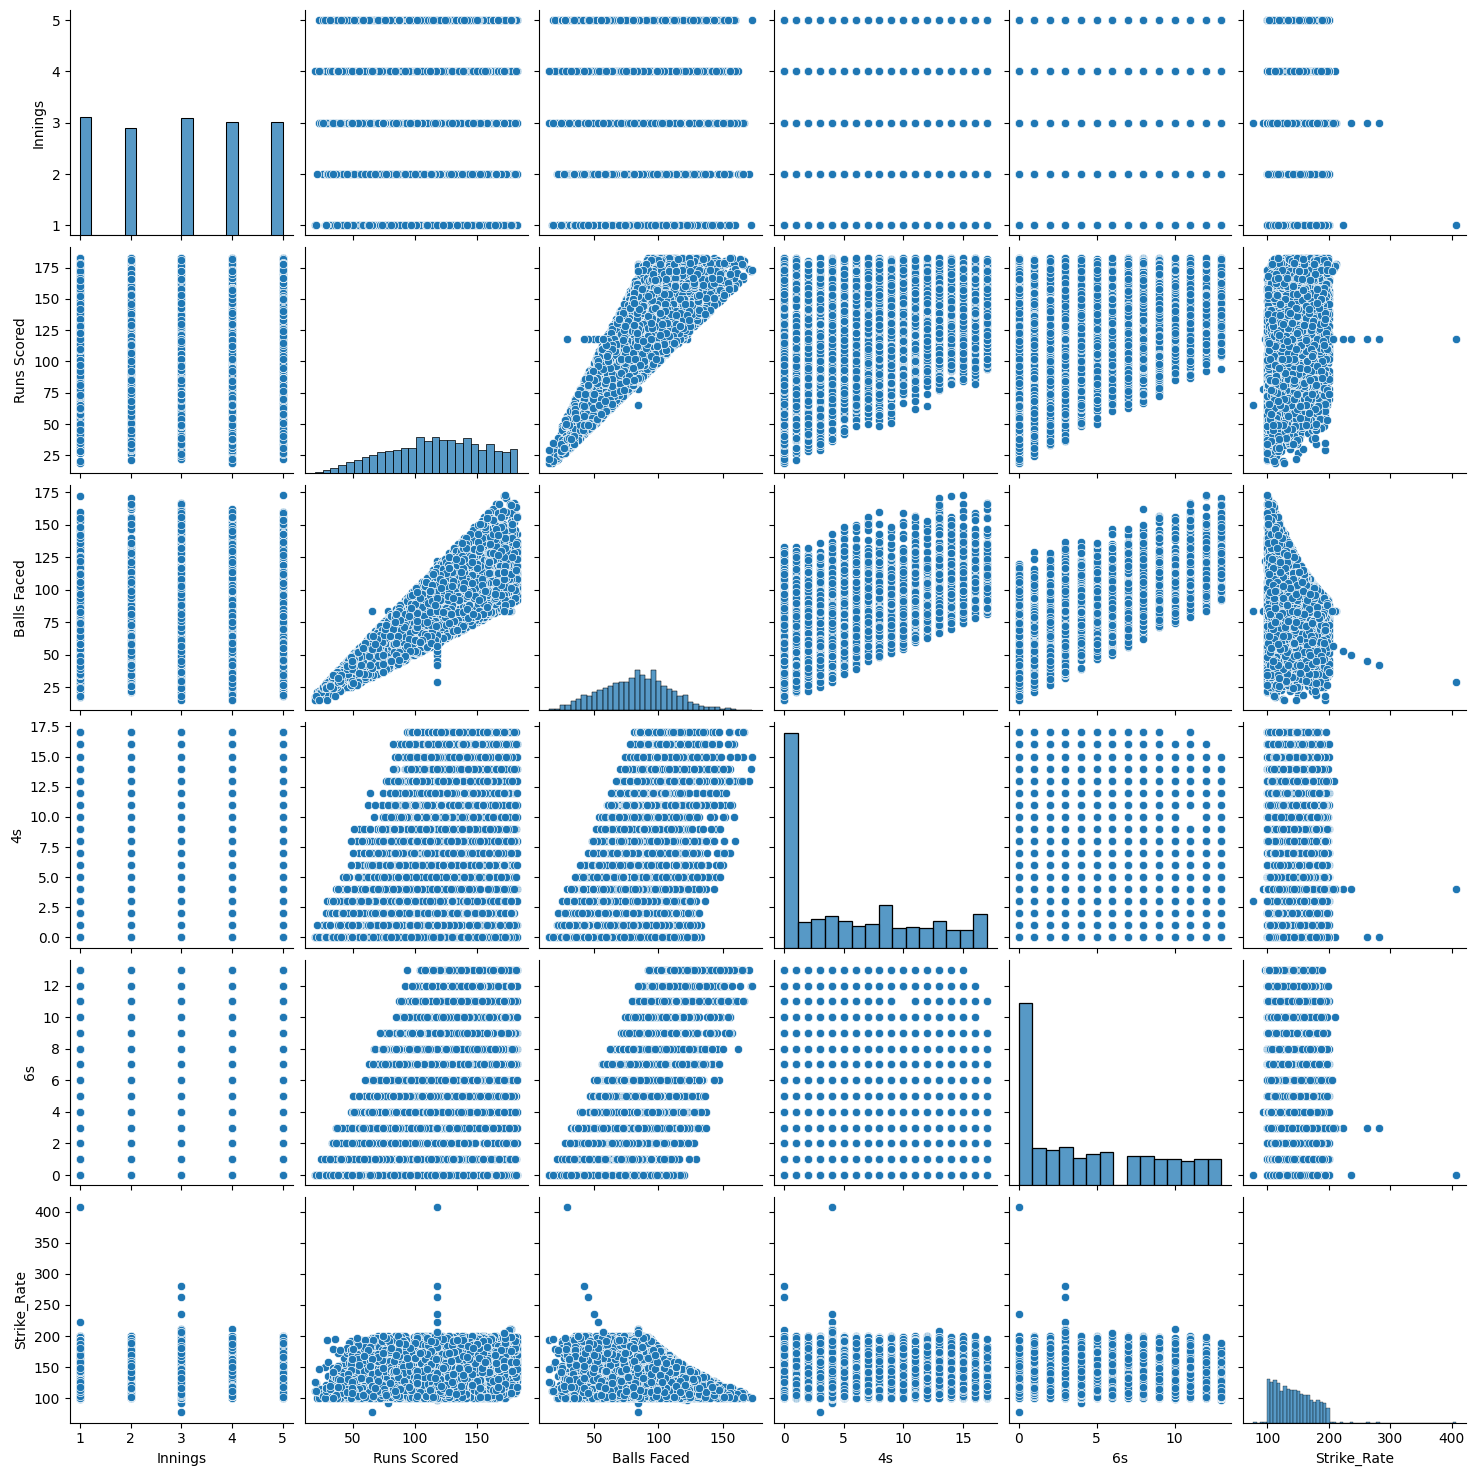

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['Innings', 'Runs Scored', 'Balls Faced', '4s', '6s', 'Strike_Rate']
sns.pairplot(data[numerical_cols])
plt.show()


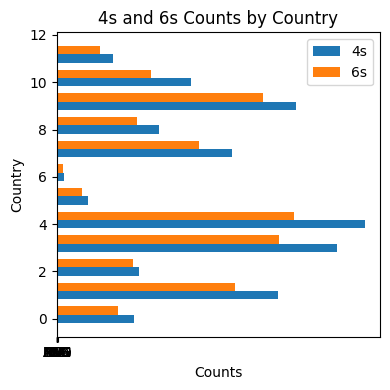

In [16]:
country_stats = data.groupby('Country')[['6s', '4s']].sum()

plt.figure(figsize=(4, 4))
bar_width = 0.35
index = range(len(country_stats))
plt.barh(index, country_stats['4s'], bar_width, label='4s')
plt.barh([i + bar_width for i in index], country_stats['6s'], bar_width, label='6s')

plt.ylabel('Country')
plt.xlabel('Counts')
plt.title('4s and 6s Counts by Country')
plt.xticks([i + bar_width / 2 for i in index], country_stats.index)
plt.legend()
plt.tight_layout()

plt.show()


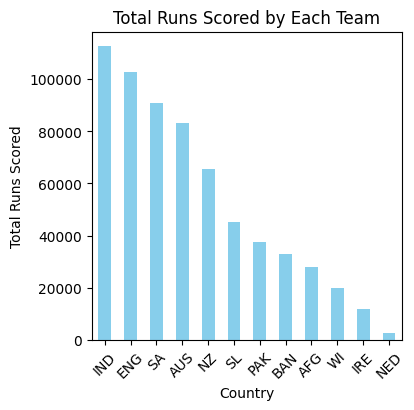

In [17]:
team_runs = data.groupby('Country')['Runs Scored'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 4))
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Country')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.show()


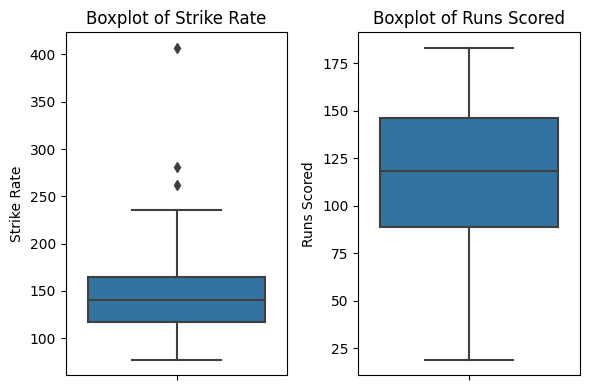

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

sns.boxplot(y=data['Strike_Rate'], ax=axes[0])
axes[0].set_title('Boxplot of Strike Rate')
axes[0].set_ylabel('Strike Rate')

sns.boxplot(y=data['Runs Scored'], ax=axes[1])
axes[1].set_title('Boxplot of Runs Scored')
axes[1].set_ylabel('Runs Scored')

plt.tight_layout()
plt.show()


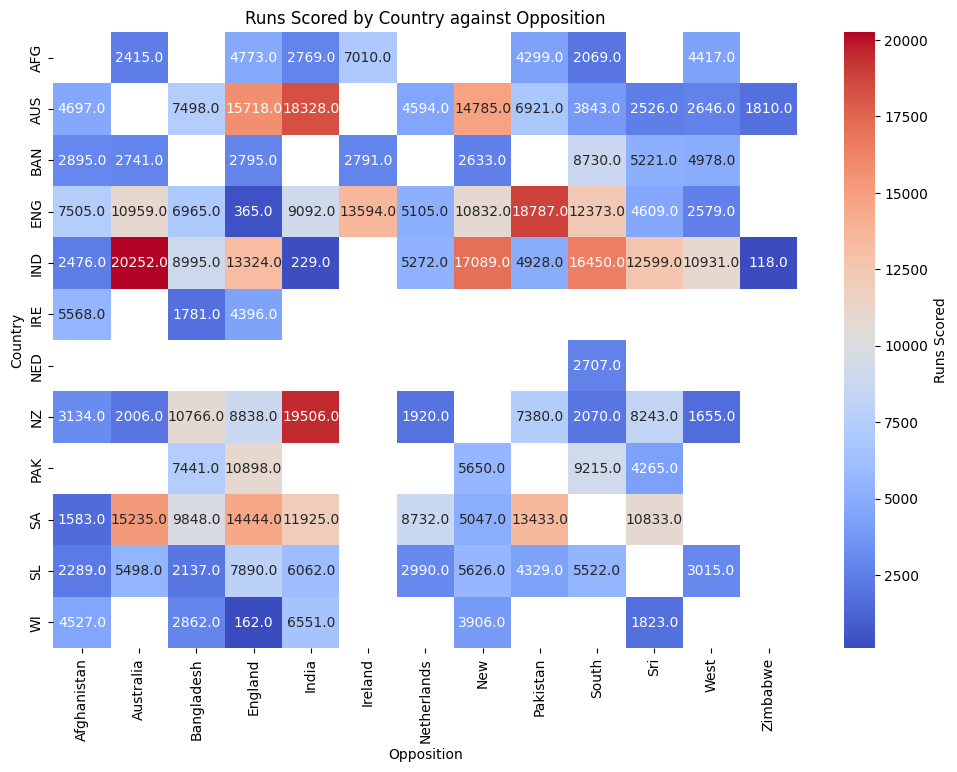

In [19]:
pivot_data = data.pivot_table(index='Country', columns='Opposition', values='Runs Scored', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Runs Scored'})
plt.title('Runs Scored by Country against Opposition')
plt.xlabel('Opposition')
plt.ylabel('Country')
plt.show()


In [20]:
data.drop(['Country', 'Match Date'], axis=1, inplace=True)


In [21]:
data

,Player,Innings,Runs Scored,Balls Faced,4s,6s,Opposition,Ground,Strike_Rate
0,Shubman Gill,2,135,83,13,0,Australia,Indore,162.650602
1,Shubman Gill,4,114,76,10,1,Sri,Wankhede,150.000000
2,Fakhar Zaman,2,156,92,2,11,South,Centurion,169.565217
3,Fakhar Zaman,2,101,52,6,0,Bangladesh,Eden Gardens,194.230769
4,BA Stokes,3,118,50,4,0,England,Manchester,236.000000
...,...,...,...,...,...,...,...,...,...
5495,PR Stirling,4,38,32,4,0,Afghanistan,Dehradun,118.750000
5496,Fakhar Zaman,3,147,81,10,0,New,Bengaluru,181.481481
5497,JE Root,4,84,75,7,2,South,Chester-le-Street,112.000000
5498,DJ Malan,4,172,114,6,11,South,Kimberley,150.877193


In [22]:
data.columns

Index(['Player', 'Innings', 'Runs Scored', 'Balls Faced', '4s', '6s',
       'Opposition', 'Ground', 'Strike_Rate'],
      dtype='object')

In [23]:
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression


  # Prepare features (X) and target variable (y)
  # X contains features: Balls Faced, 6s, 4s, Strike Rate
  X = data[['Balls Faced', '6s', '4s', 'Strike_Rate']]
  y = data['Runs Scored']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  predicted_runs_train = model.predict(X_train)
  accuracy_train = model.score(X_train, y_train)
  print(f"Train Accuracy: {accuracy_train}")

  predicted_runs = model.predict(X_test)
  accuracy = model.score(X_test, y_test)
  print(f"Test Accuracy: {accuracy}")
  # Combine player names with predicted runs
  players_predicted_runs = pd.DataFrame({
      'Player': data.loc[X_test.index, 'Player'],
      'Actual Runs': y_test,
      'Predicted Runs': predicted_runs
  })


  ranked_players = players_predicted_runs.sort_values(by='Predicted Runs', ascending=False)
  print(ranked_players['Player'].unique()[:11])


Train Accuracy: 0.9622136547408726
Test Accuracy: 0.9604132688780135
['SS Iyer' 'JM Vince' 'GJ Maxwell' 'Hashmatullah Shahidi' 'Imam-ul-Haq'
 'Q de Kock' 'V Kohli' 'KS Williamson' 'DA Warner' 'HE van der Dussen'
 'JM Bairstow']


In [24]:
data.drop(columns=['Opposition','Ground'], inplace=True)
print(data.head())


         Player  Innings  Runs Scored  Balls Faced  4s  6s  Strike_Rate
0  Shubman Gill        2          135           83  13   0   162.650602
1  Shubman Gill        4          114           76  10   1   150.000000
2  Fakhar Zaman        2          156           92   2  11   169.565217
3  Fakhar Zaman        2          101           52   6   0   194.230769
4     BA Stokes        3          118           50   4   0   236.000000


In [25]:

grouped_data = data.groupby('Player').agg({
    'Balls Faced': 'sum',
    'Runs Scored': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'Strike_Rate': 'mean'
}).reset_index()

grouped_data

,Player,Balls Faced,Runs Scored,4s,6s,Strike_Rate
0,A Balbirnie,3829,5210,238,213,138.618766
1,AD Mathews,3833,5303,291,189,141.517386
2,AJ Finch,6607,9442,465,328,144.287561
3,AJ Turner,1182,1650,65,69,142.215540
4,AK Markram,10778,15346,745,527,145.409336
...,...,...,...,...,...,...
105,UT Khawaja,6398,8959,414,331,142.175809
106,V Kohli,13432,18484,935,708,140.279696
107,WA Young,1431,1920,94,81,133.275908
108,WG Jacks,1419,2051,81,77,146.994963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

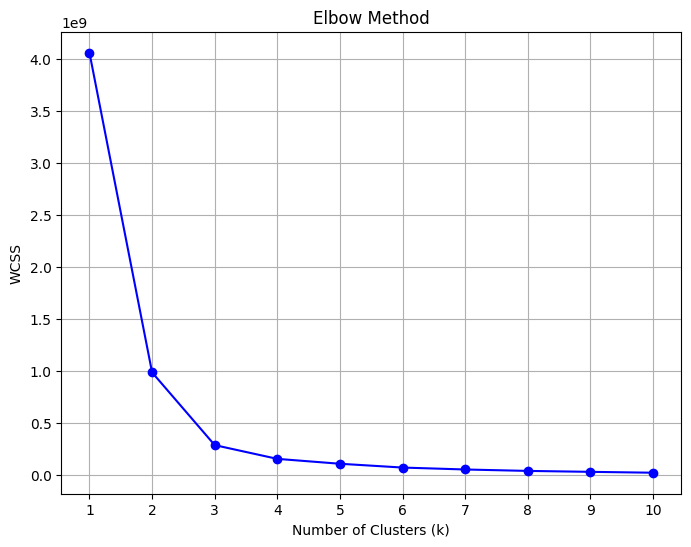

In [26]:
from sklearn.cluster import KMeans

X = grouped_data[['Balls Faced', 'Runs Scored']]

# Within-Cluster Sum of Squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


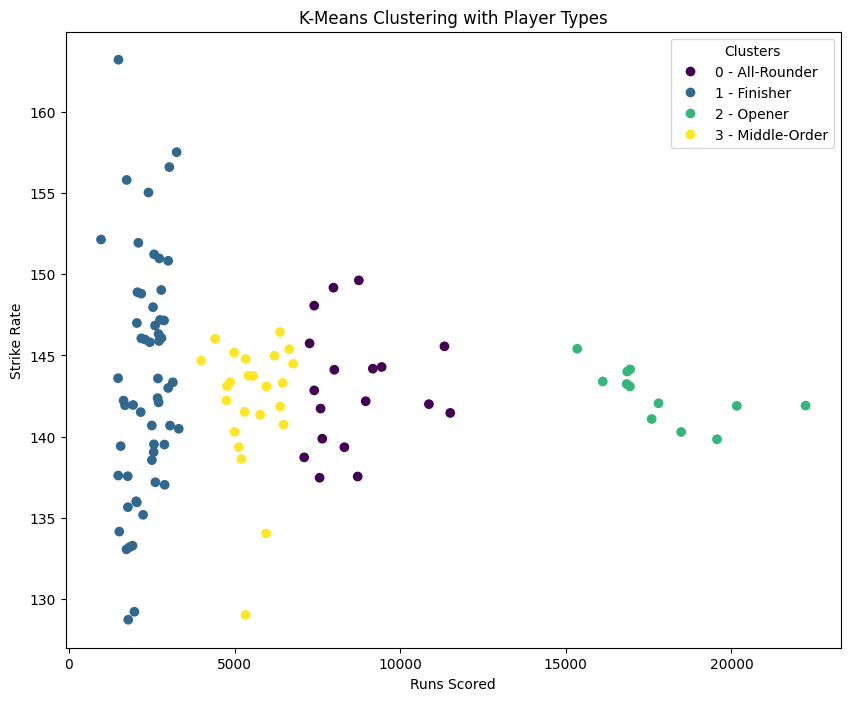

           Player  Runs Scored  Strike_Rate  Cluster   Player_Type
0     A Balbirnie         5210   138.618766        3  Middle-Order
1      AD Mathews         5303   141.517386        3  Middle-Order
2        AJ Finch         9442   144.287561        0   All-Rounder
3       AJ Turner         1650   142.215540        1      Finisher
4      AK Markram        15346   145.409336        2        Opener
..            ...          ...          ...      ...           ...
105    UT Khawaja         8959   142.175809        0   All-Rounder
106       V Kohli        18484   140.279696        2        Opener
107      WA Young         1920   133.275908        1      Finisher
108      WG Jacks         2051   146.994963        1      Finisher
109  WIA Fernando         3251   157.521517        1      Finisher

[110 rows x 5 columns]


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Player' column
label_encoder_player = LabelEncoder()
grouped_data['Player_encoded'] = label_encoder_player.fit_transform(grouped_data['Player'])

X = grouped_data[['Runs Scored', 'Balls Faced', 'Strike_Rate', 'Player_encoded']]


kmeans = KMeans(n_clusters=4, random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(X)

cluster_mapping = {
    0: 'All-Rounder',
    1: 'Finisher',
    2: 'Opener',
    3: 'Middle-Order'
}

grouped_data['Player_Type'] = grouped_data['Cluster'].map(cluster_mapping)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(grouped_data['Runs Scored'], grouped_data['Strike_Rate'], c=grouped_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with Player Types')
plt.xlabel('Runs Scored')
plt.ylabel('Strike Rate')
legend_labels = [f'{i} - {cluster_mapping[i]}' for i in range(4)]  # Adjust based on the number of clusters
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

print(grouped_data[['Player', 'Runs Scored', 'Strike_Rate', 'Cluster', 'Player_Type']])

In [28]:
grouped_data.columns

Index(['Player', 'Balls Faced', 'Runs Scored', '4s', '6s', 'Strike_Rate',
       'Player_encoded', 'Cluster', 'Player_Type'],
      dtype='object')

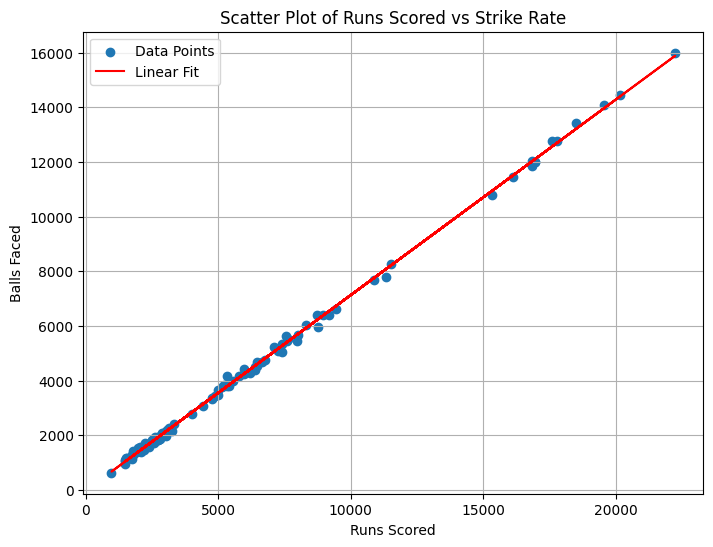

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(grouped_data['Runs Scored'], grouped_data['Balls Faced'], label='Data Points')
plt.xlabel('Runs Scored')
plt.ylabel('Balls Faced')
plt.title('Scatter Plot of Runs Scored vs Strike Rate')

# Fit a linear regression line
m, b = np.polyfit(grouped_data['Runs Scored'], grouped_data['Balls Faced'], 1)
plt.plot(grouped_data['Runs Scored'], m * grouped_data['Runs Scored'] + b, color='red', label='Linear Fit')

plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Assuming 'grouped_data' contains the data
selected_opener_players = grouped_data[(grouped_data['Player_Type'] == 'Opener') & (grouped_data['Cluster'] == 2)].sample(2)
selected_middleorder_players = grouped_data[(grouped_data['Player_Type'] == 'Middle-Order') & (grouped_data['Cluster'] == 3)].sample(2)
selected_finisher_player = grouped_data[(grouped_data['Player_Type'] == 'Finisher') & (grouped_data['Cluster'] == 1)].sample(1)
selected_allrounder_player = grouped_data[(grouped_data['Player_Type'] == 'All-Rounder') & (grouped_data['Cluster'] == 0)].sample(1)

# Display the randomly selected players
print("Randomly selected Opener Players:")
print(selected_opener_players['Player'].to_string(index=False))

print("\nRandomly selected Middle-Order Players:")
print(selected_middleorder_players['Player'].to_string(index=False))

print("\nRandomly selected Finisher Player:")
print(selected_finisher_player['Player'].to_string(index=False))

print("\nRandomly selected All-Rounder Player:")
print(selected_allrounder_player['Player'].to_string(index=False))


Randomly selected Opener Players:
    SS Iyer
JM Bairstow

Randomly selected Middle-Order Players:
A Balbirnie
     JJ Roy

Randomly selected Finisher Player:
Rahmat Shah

Randomly selected All-Rounder Player:
MR Marsh
